In [1]:
#Note: we only repeat this step from before, because this is a new .ipyb page.
#   it only needs to be executed once per file.

#We'll import libraries as needed, but when submitting, having them all at the top is best practice
import pandas as pd

# Reloading the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
df = pd.read_csv(url) #read CSV into Python as a dataframe

column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'type']
df = pd.read_csv(url, names = column_names) #read CSV into Python as a dataframe

#Choosing sepal-length as the independent variable. 
X = df.drop(columns=['sepal-length']) #indpendent variables
y = df[['sepal-length']].copy() #dependent variables

In [LINK GOES HERE] the previous section, we avoid using categorical data by simplifying and removing it. While this sped things along, it also dropped potentially valuable insight from our analysis. Now that code is working, we'll rebuild our models using that categorical data, the 'type' feature.

In [2]:
df_sample = df.sample(n=10, random_state = 152)
# df_sample_highlight = pd.concat([df_sample.iloc[:5,:], df_sample.iloc[-5:,:]]).style.format().set_properties(subset=['type'], **{'background-color': 'yellow'})

# function definition
def highlight_cols(s):
    color = 'null'
    if s == 'Iris-virginica': color = 'limegreen'
    elif s == 'Iris-setosa': color = 'lightblue'
    elif s == 'Iris-versicolor': color = 'orange'
    # color = 'red' if s == 'Iris-virginica' or 'blue' if s == 'Iris-setosa'
    return 'background-color: % s' % color
  
# highlighting the cells
df_sample.style.applymap(highlight_cols)


,sepal-length,sepal-width,petal-length,petal-width,type
38,4.400000,3.000000,1.300000,0.200000,Iris-setosa
115,6.400000,3.200000,5.300000,2.300000,Iris-virginica
36,5.500000,3.500000,1.300000,0.200000,Iris-setosa
122,7.700000,2.800000,6.700000,2.000000,Iris-virginica
21,5.100000,3.700000,1.500000,0.400000,Iris-setosa
7,5.000000,3.400000,1.500000,0.200000,Iris-setosa
89,5.500000,2.500000,4.000000,1.300000,Iris-versicolor
48,5.300000,3.700000,1.500000,0.200000,Iris-setosa
51,6.400000,3.200000,4.500000,1.500000,Iris-versicolor
127,6.100000,3.000000,4.900000,1.800000,Iris-virginica


We have three unique flower types, equally distributed, in this feature:

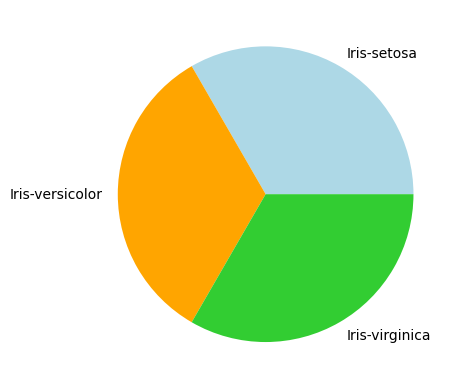

In [3]:
df.groupby('type').size().plot(kind='pie',colors = ['lightblue', 'orange', 'limegreen']);


Recall, a coding error [LINK HERE] was returned because the algorithm could not process categorical independent variables.  

CHECK!!!

Most machine learning models can only interpret numerical data. Thus *feature encoding*, processing data into numerical form, is an essential data analytical skill. To do this properly you should understand your data before preceding. For example, we could simply re-label the types as follows:

$$
  \int_0^\infty \frac{x^3}{e^x-1}\,dx = \frac{\pi^4}{15}
$$

$this_{is}^{inline}$

$$ 
  \text{Iris-setosa} \rightarrow 1 \\
  \text{Iris-versicolor} \rightarrow 2 \\
  \text{Iris-virginica} \rightarrow 3 \\
$$

   
and hand this off to the algorithm. But while this would fix the coding error, any mathematical interpretation of this re-labeling would be meaningless, e.g., 'Iris-setosa' is not twice as much as 'Iris-versicolor,' nor does 'setosa' + 'versicolor' = 'virginica' -the type is just a name. We call this type of categorical data *nominal.* Categories with an inherent order, e.g., grades, pay grades, bronze-silver-gold, etc., are called *ordinal.* But that doesn't apply here either. A flower either is an 'Iris-setosa' OR it isn't. Each type is similarly binary so we can interpret *each unique type as a unique feature*, with a 1 or 0, indicating whether the category applies or not, respectively. 

Most machine learning libraries are well equipped with built-in preprocessing functions; see the available options in the docs: [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). For simplicity, we'll start with Pandas' built-in [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). However, it will often be best to use functions specifically written for your model's library, such as sklearn's [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). 

In [4]:
after_pd_dummy = pd.get_dummies(df_sample)

In [5]:

#highlight values according to column names and values. 
def highlight_cols_dummy(col):
    if col.name == 'type_Iris-setosa':
        return ['background-color: lightblue' if c == 1 else '' for c in col.values]
    elif col.name == 'type_Iris-versicolor':
        return ['background-color: orange' if c == 1 else '' for c in col.values]
    elif col.name == 'type_Iris-virginica':
        return ['background-color: lightgreen' if c == 1 else '' for c in col.values]
    else:
        return ['background-color: null' for c in col.values]

# #Nice displays are nice but not required. 
from IPython.display import display_html 
before_styler = df_sample.style.set_table_attributes("style='display:inline'").set_caption('Before').applymap(highlight_cols).format(precision = 1)
after_styler = after_pd_dummy.style.set_table_attributes("style='display:inline'").set_caption('After <em>get_dummy</em>').apply(highlight_cols_dummy).format(precision = 1)
# space = "\xa0" * 10 #space between columns
arrow = "<html> <huge>&#x21e8;</huge> </html>"

# displays dataframes side by side
display_html(before_styler._repr_html_() + arrow + after_styler._repr_html_(), raw=True)

,sepal-length,sepal-width,petal-length,petal-width,type
38,4.4,3.0,1.3,0.2,Iris-setosa
115,6.4,3.2,5.3,2.3,Iris-virginica
36,5.5,3.5,1.3,0.2,Iris-setosa
122,7.7,2.8,6.7,2.0,Iris-virginica
21,5.1,3.7,1.5,0.4,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
89,5.5,2.5,4.0,1.3,Iris-versicolor
48,5.3,3.7,1.5,0.2,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor
127,6.1,3.0,4.9,1.8,Iris-virginica


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error


df_dummy = pd.get_dummies(df)
df_dummy
df_s = df_dummy.loc[df_dummy['type_Iris-setosa'] == 1].drop(columns=['type_Iris-versicolor', 'type_Iris-virginica'])

df_v = df_dummy.loc[df_dummy['type_Iris-versicolor'] == 1].drop(columns=['type_Iris-setosa', 'type_Iris-virginica'])

df_g = df_dummy.loc[df_dummy['type_Iris-virginica'] == 1].drop(columns=['type_Iris-setosa', 'type_Iris-versicolor'])

def line_regression_pipe(df_list):
    for df in df_list:
        X = df.drop(columns=['sepal-length']) #indpendent variables
        y = df[['sepal-length']].copy() #dependent variables
        #split the variable sets into training and testing subsets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)
        linear_reg_model_a = LinearRegression()
        linear_reg_model_a.fit(X_train,y_train)
        y_pred = linear_reg_model_a.predict(X_test)
        sme = mean_squared_error(y_test, y_pred)
        print('sme of ' + df.columns[4] + ' is :' + str(sme) )

df_list = [df_s, df_v, df_g]
line_regression_pipe(df_list)


sme of type_Iris-setosa is :0.06604867484155268
sme of type_Iris-versicolor is :0.09862408497975977
sme of type_Iris-virginica is :0.0802189108860733


In [7]:
# from sklearn.preprocessing import OneHotEncoder

#Instantiate OneHotEncoder (ohe). 
#Note Pandas get_dummies can also perform this function, but ohe has some ML application advantages.

ohe = OneHotEncoder(sparse = False) 

NameError: name 'OneHotEncoder' is not defined